<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic8/topic8_intro_to_ML_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

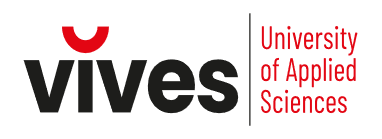<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING WITH PYTHON**

This notebook is a brief introduction to using Pandas for solving machine learning problems that deal with structured datasets.

## **Python libraries**

We need the following libraries:
- NumPy: library for numerical computation.
- Pandas: library for analyzing structured data
- Matplotlib: library for visualizing data
- Scikit-Learn: machine learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np` and Pandas alias `pd`. From Matplotlib, we need the `pyplot` module; the convention is to import it as `plt`.

In [1]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 80  # set figure dpi

From Scikit-Learn we import only the classes we use at the time we need them.

## **Pandas**

Machine learning that is not deep learning - often referred to as *shallow learning* - usually deals with **structured data** only. These are data that are stored in two-dimensional tables, which are found in relational databases, but also in Excel spreadsheets or csv-files. To handle this kind of data, we will use Pandas, a powerful and versatile Python library designed for data manipulation and analysis.

The fundamental data structure in Pandas is a dataframe, which is basically a two-dimensional table. A dataframe can be created using the `DataFrame` constructor:

In [2]:
data = dict(
    day=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    temperature=[15, 10, 12, 18, 16, 11, 17],  # in degrees Celcius
    rain=[3.1, 0.0, 0.2, 2.1, 1.0, 0.0, np.nan],  # in mm
    wind=['strong', 'mild', 'mild', 'mild', 'strong', 'mild', pd.NA]
)

df = pd.DataFrame(data)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild
6,Sunday,17,NaN,<NA>


Checking the data type of `df`, we see it is a `DataFrame` indeed:

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


The `NaN` value stands for "not-a-number" and the `NA` value for "not available". When dealing with large datasets, one may use method `isna` to check if there are missing values:

In [4]:
np.any(df.isna())  # np.any returns true if at least one element is True

True

The `info` method gives an overview:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          7 non-null      object 
 1   temperature  7 non-null      int64  
 2   rain         6 non-null      float64
 3   wind         6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 352.0+ bytes


Note that the columns having 'object' as data type (Dtype) actually contain string objects.

By invoking method `describe`, we get the descriptive statistics of the numerical variables:

In [6]:
df.describe().T  # use .T to transpose the output

,count,mean,std,min,25%,50%,75%,max
temperature,7.0,14.142857,3.132016,10.0,11.50,15.0,16.500,18.0
rain,6.0,1.066667,1.283225,0.0,0.05,0.6,1.825,3.1


We see the `NaN` value is not taken into account. It is also possible to plot these numerical variables:

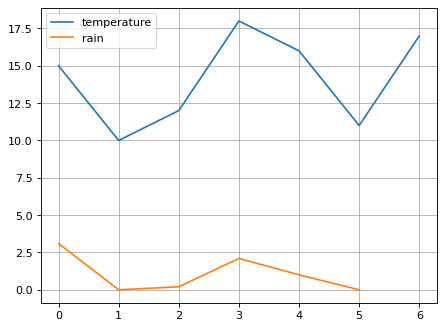

In [7]:
df.plot();
plt.grid();

Selecting a specific column can be done in two ways:

In [8]:
print(df.temperature)
print(df['rain'])

0    15
1    10
2    12
3    18
4    16
5    11
6    17
Name: temperature, dtype: int64
0    3.1
1    0.0
2    0.2
3    2.1
4    1.0
5    0.0
6    NaN
Name: rain, dtype: float64


The result of these operations is not a Pandas dataframe, but a Pandas series, which is a 1D data structure:

In [9]:
print(type(df.rain))

<class 'pandas.core.series.Series'>


Pandas provides all kind of methods that can be performed on the data. Some examples:

In [10]:
df.sort_values(by=['rain', 'temperature'])  # sort rows by rain values and then by temperature values

,day,temperature,rain,wind
1,Tuesday,10,0.0,mild
5,Saturday,11,0.0,mild
2,Wednesday,12,0.2,mild
4,Friday,16,1.0,strong
3,Thursday,18,2.1,mild
0,Monday,15,3.1,strong
6,Sunday,17,NaN,<NA>


In [11]:
df.wind.unique()  # unique values in column wind

array(['strong', 'mild', <NA>], dtype=object)

In [12]:
df[['temperature', 'rain']].max(axis=0)  # maximum of columns temperature and rain

temperature    18.0
rain            3.1
dtype: float64

In [13]:
df[['temperature', 'rain']].sum(axis=1)  # sum or rows

0    18.1
1    10.0
2    12.2
3    20.1
4    17.0
5    11.0
6    17.0
dtype: float64

The missing values are not taken into account here, but they may be an issue when applying machine learning models. One strategy is to replace them by the mean, the median or the mode of a variable. In general, the process of replacing missing data with substituted values is called **imputation**.

Here, we replace the `NaN` value by the mean of the rain values, and the `NA` value by the mode of the wind values, that is the most frequent value. Replacing missing values is straightforward using method `fillna`:

In [14]:
df['wind'] = df['wind'].fillna(df.wind.mode().iloc[0])  # iloc[0] selects the first element
df['rain'] = df['rain'].fillna(df.rain.mean())
df

,day,temperature,rain,wind
0,Monday,15,3.100000,strong
1,Tuesday,10,0.000000,mild
2,Wednesday,12,0.200000,mild
3,Thursday,18,2.100000,mild
4,Friday,16,1.000000,strong
5,Saturday,11,0.000000,mild
6,Sunday,17,1.066667,mild


Another option is to omit the samples containing missing values, which is easy using method `drop`:

In [15]:
df = df.drop(index=6)
df

,day,temperature,rain,wind
0,Monday,15,3.1,strong
1,Tuesday,10,0.0,mild
2,Wednesday,12,0.2,mild
3,Thursday,18,2.1,mild
4,Friday,16,1.0,strong
5,Saturday,11,0.0,mild


Using method `drop`, it is also possible to delete a column:

In [16]:
df = df.drop(columns=['day'])
df

,temperature,rain,wind
0,15,3.1,strong
1,10,0.0,mild
2,12,0.2,mild
3,18,2.1,mild
4,16,1.0,strong
5,11,0.0,mild


As we've seen in previous code examples, the dataframe methods operate on entire columns or rows, although these methods actually apply to individual entries. This is an interesting property of Pandas dataframes: they allow for **vectorized expressions**, which means that the methods perform element-by-element operations without having to use a loop.

Suppose we want to convert the temperature values in our table from degrees Celsius to degrees Fahrenheit using the following well-known formula:

> `°F = °C * 9 / 5 + 32`

To do so, we don't need to loop over the rows, but we can apply the conversion formula directly to the `'temperature'` column:



In [17]:
df.temperature = df.temperature * 9 / 5 + 32
df

,temperature,rain,wind
0,59.0,3.1,strong
1,50.0,0.0,mild
2,53.6,0.2,mild
3,64.4,2.1,mild
4,60.8,1.0,strong
5,51.8,0.0,mild


Not only they make our code more readable, but in most cases, it is also computationally more efficient to use vectorized operations instead of loops!

Similar to SQL, it is also possible to apply the `groupby` method, for instance, to calculate the mean temperature for different wind categories:

In [18]:
df[['temperature', 'wind']].groupby(by='wind').mean()

,temperature
wind,
mild,54.95
strong,59.90


And there are many other advanced functionalities! As already mentioned, Pandas is a very powerful Python library for data analysis that has become a standard tool for data scientists. No wonder it is sometimes called Excel on steroids...

So, that concludes our Pandas 101. We're now prepared to delve into the application of machine learning algorithms to structured data!

## **What is Machine Learning?**

Let's begin by trying to understand the difference between traditional programming and classical AI on one hand and machine learning on the other. The following picture clearly summarizes it:

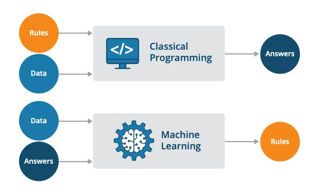

In both cases we have input data. In classical programming and AI, we also know the rules, and if an **algorithm** applies these rules to the input data, then we get the answers or the output. In machine learning, we don't know the rules, also called the **model**. In case of **supervised learning**, however, we know the answers, and the machine learning algorithm will derive the rules from these (input, output) pairs. So, a machine learning algorithm returns a model! That model can be used afterwards like a classical program to **predict** answers on new data.

### Classical Programming

An example to illustrate this. Suppose we have to write a program that controls the thermostat: when the temperature is lower than 17.5 degrees Celsius, the heating should be on; otherwise, the heating is off. That is very straightforward to implement:

In [19]:
threshold = 17
temperature = float(input("What is the temperature?\n"))  # data (input)
heating = 'on' if temperature < threshold else 'off'      # rule
print(f'The heating is {heating}!')                       # answer (output)

What is the temperature?
18
The heating is off!


That is an example of traditional programming:
- you get the input data: the temperature
- and the rule: if the given temperature is lower than 17.5, then the heating is on, otherwise it is off.
- so your algorithm is able to calculate the output by applying the rule to the input.

### Machine Learning

In Machine Learning, we do not know the rule, but we get the input, and when we have to solve a supervised learning problem, then we also have the ouput at our disposal:

In [2]:
import pandas as pd

temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]  # data (input)
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']  # corresponding answers (output)

# put in Pandas DataFrame to get a table
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

,temperature,heating
0,17.1,off
1,15.6,on
2,23.1,off
3,19.8,off
4,12.9,on
5,20.3,off
6,14.7,on
7,16.2,on


Here the challenge is to derive the rule from these (input, output) pairs. Taking a closer look to the table, we see there are two columns: one with the temperature values and one indicating the corresponding state of the heating. So the input is the 'temperature' column and the output is the 'heating' column. In machine learning, the first is called a **feature**, and the second contains the **labels**. Sometimes it's also called the independent and dependent variable, respectively.

It's always a good idea to visualize the data. Let's define a function to do that:

In [21]:
def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

By plotting the data we see it is easy to separate the 'on' and 'off' temperatures:

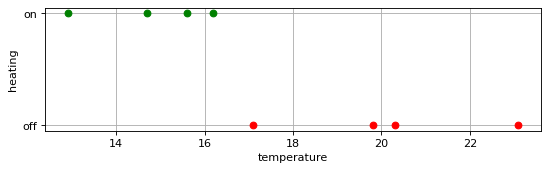

In [22]:
plot_temperature_heating(table);

### Decision Tree

A naive way of separating both classes is defining the threshold as the average of the maximum 'on' temperature and the minimum 'off' temperature:

In [23]:
max_temperature_on = table[table.heating=='on']['temperature'].max()
min_temperature_off = table[table.heating=='off']['temperature'].min()
threshold = (max_temperature_on + min_temperature_off) / 2
print(f'maximum temperature if heating is on: {max_temperature_on}°C')
print(f'minimum temperature if heating is off: {min_temperature_off}°C')
print(f'threshold is {threshold}°C')

maximum temperature if heating is on: 16.2°C
minimum temperature if heating is off: 17.1°C
threshold is 16.65°C


Let's add the derived threshold to the plot:

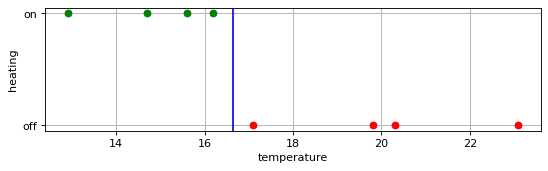

In [24]:
ax = plot_temperature_heating(table);
yl = ax.get_ylim();
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_ylim(yl);

We have called this approach "naive", however, several well-known machine learning algorithms, such as the perceptron algorithm and logistic regression, also determine a threshold to seperate the two classes. And when we use Scikit-Learn to build a **decision tree** based on this dataset, it actually gives the same result!

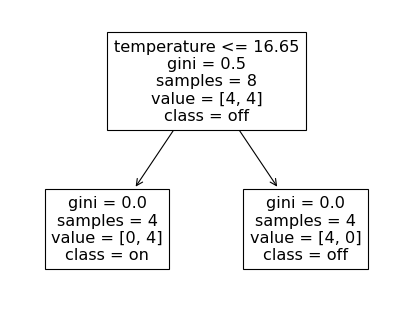

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()   # instantiate the DecisionTreeClassifier class

tree.fit(table[['temperature']],  # feature
         table.heating=='on')     # labels

# plot the resulting decision tree
plot_tree(tree, feature_names=['temperature'], class_names=['off', 'on']);

As we see, the resulting decision tree also uses 16.65 as a threshold to seperate the temperature values in two classes: if the temperature is less than or equal to this threshold, the heating is 'on', which is indicated by the left branch; otherwise the right branch is taken in which case the heating is 'off'.

Because we are classifying the data into two classes, this is an example of **binary classification**. As already mentioned, other classification algorithms exist, such as perceptron, logistic regression, naive bayes, and even artificial neural networks can be used to solve classification tasks!

### Nearest Neighbor

Another way to decide whether the heating is on or off given a new temperature, is to simply adopt the output of the closest temperature, called the **nearest neighbor**, which is found by calculating the absolute difference between the given temperature and the temperatures in the dataset and taking the sample having the smallest absolute difference:

> $\min_i{|T_{new} - T_i|}$

where $T_{new}$ is the given temperature and $T_i$ is the $i$-th temperature in the dataset. This nearest neighbor is easily found using Pandas methods `abs()` and `argmin()`:

In [ ]:
temperature = float(input("What is the temperature?\n"))  # input temperature
abs_difference = (temperature - table.temperature).abs()  # absolute difference
heating = table.heating.iloc[abs_difference.argmin()]     # label of nearest neighbor
print(f'The heating is {heating}!')                       # answer

What is the temperature?
16.5
The heating is on!


When we visualize the new data point given by the user, then we see the closest point from the dataset has label 'on' indeed:

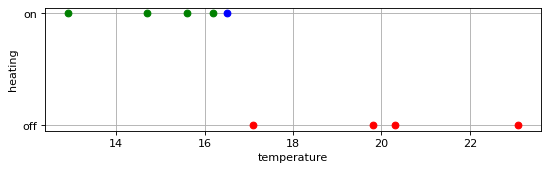

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(temperature, heating == 'on', 'bo');

This is an example of a very simple machine learning model. Actually, it is a special case of a very well-known machine learning algorithm, called **K Nearest Neighbors** (KNN). As the name suggests, this generalized version selects the K nearest neighbors to determine the output of a new sample. Here, we've set K to 1:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  # number of neighbors K is set to 1

knn.fit(table[['temperature']],  # feature
        table.heating=='on')     # labels

knn.predict(pd.DataFrame(dict(temperature=[16.5])))  # predict heating for new temperature

array([ True])

We see that the Scikit-Learn model also predicts that "heating equals 'on' is `True`" for a given new temperature of 16.5.

Next section explains the Scikit-Learn syntax.

## **Scikit-Learn**



Scikit-learn is a powerful Python library extensively used in machine learning, providing a user-friendly interface for various algorithms and tools. It offers a comprehensive suite of functionalities for data preprocessing, modeling, and evaluation, making it an indispensable tool for data scientists, machine learning engineers, and AI developers.

The Scikit-Learn API is the same for all machine learning algorithms, and it revolves around three fundamental methods:

1. **`fit`**: This method is used to train the machine learning model on the provided dataset, allowing it to learn the underlying patterns and relationships within the data. In case of supervised learning, this method accepts the features `X` and the target `y`.

2. **`score`**: After training the model, the performance of the model is evaluated by comparing its predictions `y_pred` with the actual ground truth values `y`. In case of classification, the **accuracy** is returned, which is calculated by dividing the number of correctly predicted instances by the total number of instances in the dataset.

3. **`predict`**: Once the model is trained, the predict method is employed to make predictions on new, unseen data. It takes the input data `X` as its parameter, and returns the predicted outcomes `y_pred` based on the learned patterns.



These methods reflect the fundamental steps in the machine learning workflow, as indicated by the (simplified) diagram below:

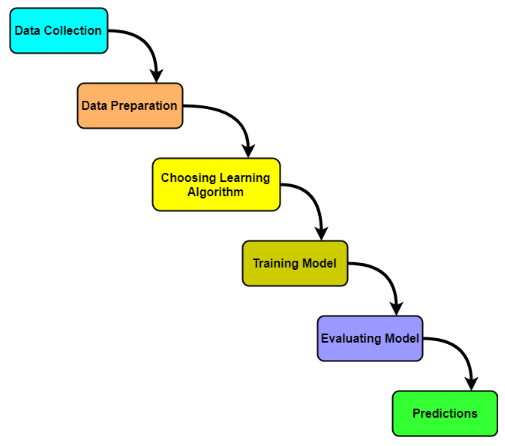

Let's illustrate this workflow and the use of the three methods by re-implementing the decision tree and the KNN model example.

### Choosing the algorithm

Recall that we have to instantiate the respective classes to get an object on which these methods can be invoked. Additionally, **hyperparameters** can be passed to the constructor in order to configure the algorithm and optimize its performance.


In [36]:
# decision tree
tree = DecisionTreeClassifier()

In [37]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1)  # n_neighbors K is a hyperparameter

Before training the model, we first need to prepare the data.

### Data preparation

It is common practice to assign features and labels to variables `X` and `y`, respectively. Variable `X` must contain a two-dimensional table or matrix; variable `y` may be one-dimensional.  

Both `X` and `y` should contain numerical values only. Therefore, categorical variables using strings must be transformed, which is called **feature encoding**.

In [38]:
X = table[['temperature']]    # X must be 2D; hence the double square brackets!
y = table['heating'] == 'on'  # labels are converted to zeros/falses and ones/trues!

In practice, the data preparation step in much more involved, and it may take up 80 to 90% of the total machine learning workflow.

### Model training

Once features and labels are determined, the model can be trained. This means the data are fitted; hence, method `fit` is invoked:

In [39]:
# decision tree
tree.fit(X, y)

DecisionTreeClassifier()

In [40]:
# KNN
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In case of the KNN model, there is no actual training involved, only some preprocessing steps. That is why it is called **lazy learning**, as opposed to **eager learning** in case of the decision tree and most other machine learning models. In the latter case, the model needs training to optimize its parameters.

### Model evaluation

Let's evaluate the performance of the models by invoking method `score`:

In [42]:
# decision tree
tree.score(X, y)

1.0

In [43]:
# KNN
knn.score(X, y)

1.0

In both cases, the model accuracy is 100%, which means all predicted labels are correct. The reason why we get a perfect score in this case, is because the dataset is very small and one-dimensional, and the two classes are perfectly separable indeed.

However, achieving a 100% accuracy rate in real-world scenarios is highly improbable or practically unattainable due to various factors such as noise in data, model complexity, or inherent uncertainty in the underlying problem. So it's important to realize a machine learning model sometimes predicts wrong values! Therefore, it is imperative to always evaluate a machine learning model to assess its performance. We will elaborate on this in the next topic as it is a fundamental aspect of machine learning.

### Making predictions

Finally, we can make predictions on new data using the trained model. This is done by calling method `predict`. First, we put the new temperature values in a pandas DataFrame using a dictionary `dict`:

In [45]:
Xnew = pd.DataFrame(
    dict(temperature=[12, 16.5, 17.5, 22])
)
Xnew

,temperature
0,12.0
1,16.5
2,17.5
3,22.0


Now we pass the new data `Xnew` to the `predict` method, which returns the predicted labels `y_pred`:

In [46]:
# decision tree
y_pred = tree.predict(Xnew)
y_pred

array([ True,  True, False, False])

In [47]:
# KNN
y_pred = knn.predict(Xnew)
y_pred

array([ True,  True, False, False])

Both models predict the same labels for the new temperature values. The corresponding on/off labels are easily obtained by converting the boolean array `y_pred` into a integer indices:

In [49]:
idx = y_pred.astype(int)          # indices
labels = np.array(['off', 'on'])  # labels: off has index 0, on has index 1!
labels[idx]

array(['on', 'on', 'off', 'off'], dtype='<U3')

In the next topic, Scikit-Learn will be applied to train and evaluate different machine learning models on more complex datasets. But first, we solve the cocktail problem (by Prof. Hendrik Blondeel, Computer Sciences, KU Leuven) discussed in the presentation using Scikit-Learn.

## **The Cocktail Example**

Consider the following "cocktail" dataset, indicating which cocktails make us happy or sick:

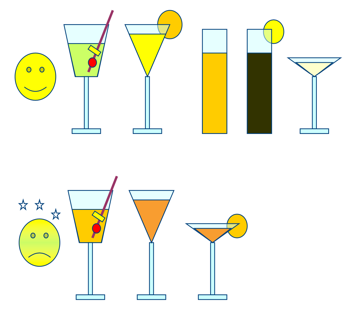

### Data preparation

Let's turn this dataset into a Pandas dataframe:

In [31]:
df = pd.DataFrame(columns=["shape", "foot", "color", "lemon", "stirrer", "sick"],
                  data=[["trapezium", "yes", "other", "no", "yes", "no"],
                        ["triangle", "yes", "other", "yes", "no", "no"],
                        ["rectangle", "no", "orange", "no", "no", "no"],
                        ["rectangle", "no", "other", "yes", "no", "no"],
                        ["triangle", "yes", "other", "no", "no", "no"],
                        ["trapezium", "yes", "orange", "no", "yes", "yes"],
                        ["triangle", "yes", "orange", "no", "no", "yes"],
                        ["triangle", "yes", "orange", "yes", "no", "yes"]])
df

,shape,foot,color,lemon,stirrer,sick
0,trapezium,yes,other,no,yes,no
1,triangle,yes,other,yes,no,no
2,rectangle,no,orange,no,no,no
3,rectangle,no,other,yes,no,no
4,triangle,yes,other,no,no,no
5,trapezium,yes,orange,no,yes,yes
6,triangle,yes,orange,no,no,yes
7,triangle,yes,orange,yes,no,yes


The **features** are the `"color"` of the cocktail, the `"shape"` of the glass and whether or not it has a `"foot"`, a `"lemon"` and a `"stirrer`. The **labels** which we want to predict are in column `"sick"`.

The first 'preprocessing' step is **encoding** these features and labels. Here, we use Scikit-Learn's `OrdinalEncoder` and `LabelEncoder`:

In [32]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# features
features = df[["shape", "foot", "color", "lemon", "stirrer"]]
feature_encoder = OrdinalEncoder()
X = feature_encoder.fit_transform(features)

# labels
labels = df['sick']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

The encoders convert the string values into numerical values:

In [33]:
np.hstack((X, y[:, np.newaxis]))  # creates matrix [X, y]

array([[1., 1., 1., 0., 1., 0.],
       [2., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [2., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 1.],
       [2., 1., 0., 0., 0., 1.],
       [2., 1., 0., 1., 0., 1.]])

The `categories_` and `classes_` attributes show which class is represented by which integer:

In [34]:
feature_encoder.categories_

[array(['rectangle', 'trapezium', 'triangle'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['orange', 'other'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [35]:
label_encoder.classes_

array(['no', 'yes'], dtype=object)

### Decision tree

The second step is **training** the model and calculating the **accuracy**. Let's start by using a decision tree:

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()  # instantiate
tree.fit(X, y)                   # train
tree.score(X, y)                 # evaluate

1.0

We get an **accuracy** of 100%, but of course, this is a very small dataset...

Let's plot the tree:

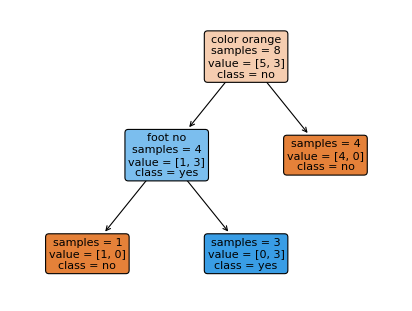

In [38]:
out = plot_tree(tree,
                feature_names=feature_encoder.feature_names_in_,
                class_names=label_encoder.classes_,
                impurity=False, filled=True, fontsize=10, rounded=True);

# the following lines of code are applicable only to this tree:
out[0].set_text(out[0].get_text().replace("<= 0.5", feature_encoder.categories_[2][0]))
out[1].set_text(out[1].get_text().replace("<= 0.5", feature_encoder.categories_[1][0]))

We see that we only get sick when the cocktail is orange and when it has a foot! Note that there are other possible solutions, like splitting on shape and color.

Let's figure out whether we will get sick if we try this new cocktail. It's orange and it has a foot, so that doesn't look great...

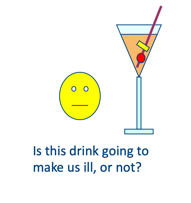

We create a Pandas dataframe containing this new data example:

In [39]:
new = pd.DataFrame(dict(shape=["triangle"],
                        foot=["yes"],
                        color=["orange"],
                        lemon=["no"],
                        stirrer=["yes"],
                        sick=["???"]))
new

,shape,foot,color,lemon,stirrer,sick
0,triangle,yes,orange,no,yes,???


We encode the new data point:

In [40]:
Xnew = feature_encoder.transform(new[new.columns[:-1]]).astype(int)
Xnew

array([[2, 1, 0, 0, 1]])

And we predict whether or not we'll get sick:

In [41]:
label = tree.predict(Xnew)[0]
print("Will we get sick?", label_encoder.classes_[label])

Will we get sick? yes


So it's probably not a good idea to drink this cocktail...

### Nearest Neighbor

Do we get the same result if we apply KNN (with K=1)?

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  # number of neighbors K is set to 1
knn.fit(X, y)    # train
knn.score(X, y)  # evaluate

1.0

The predicted label for the new cocktail:

In [43]:
label = knn.predict(Xnew)[0]
print("Will we get sick?", label_encoder.classes_[label])

Will we get sick? yes


The KNN model also predicts that we'll get sick from drinking this new cocktail...


---
---
## **Sources**

* [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html).
* [Scikit-Learn User Guide](https://scikit-learn.org/stable/user_guide.html)

---